In [345]:
import pandas as pd
import numpy as np

In [346]:
churn = pd.read_csv('Churn_Modelling.csv')

In [347]:
churn.shape

(10000, 14)

In [348]:
churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [349]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [350]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

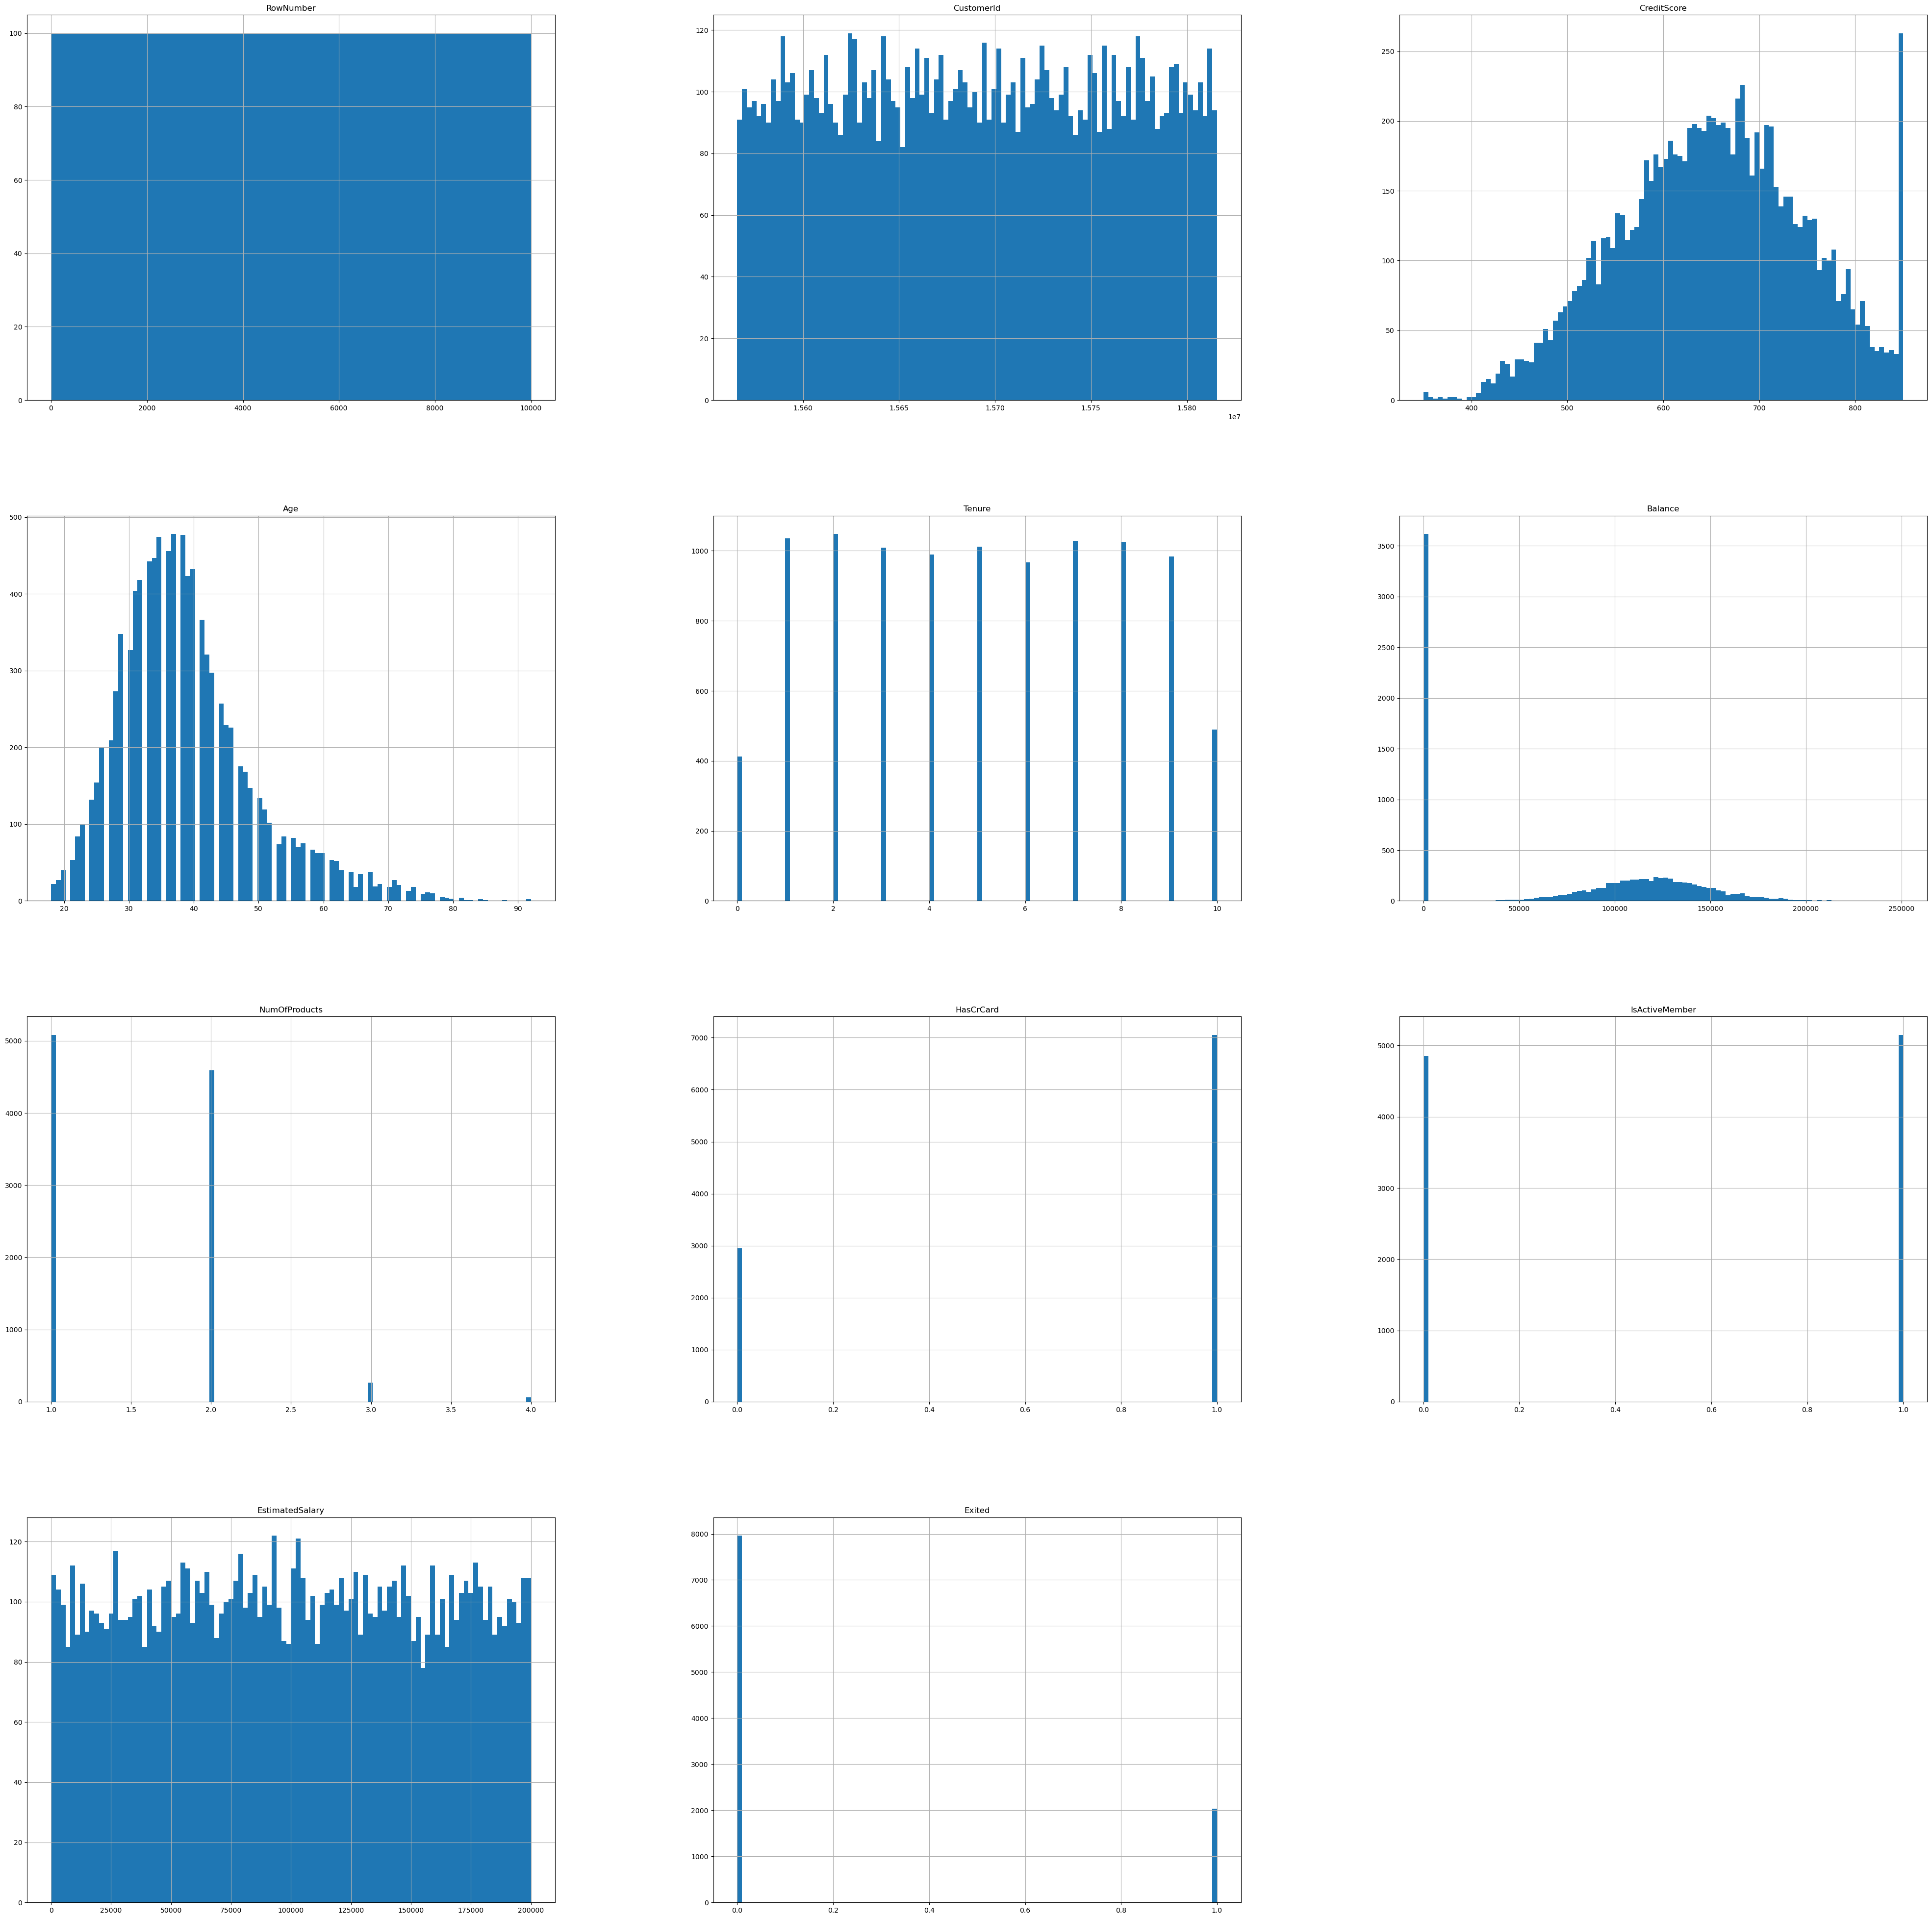

In [351]:
churn.hist(bins=100, figsize=(50, 50))

Text(0.5, 1.0, 'Distribution of Clients who Stayed or Exited')

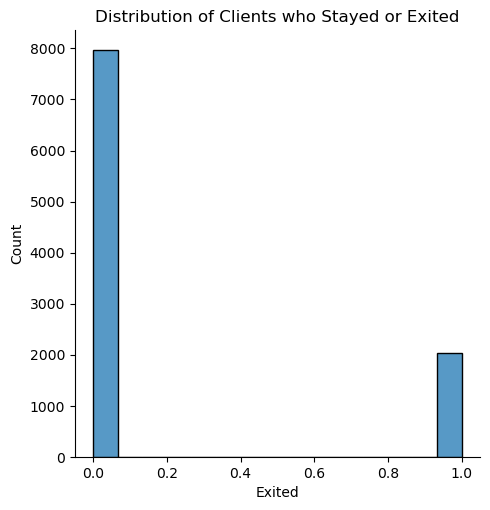

In [359]:
#Info on Target Variable
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(churn['Exited'])
plt.title('Distribution of Clients who Stayed or Exited')

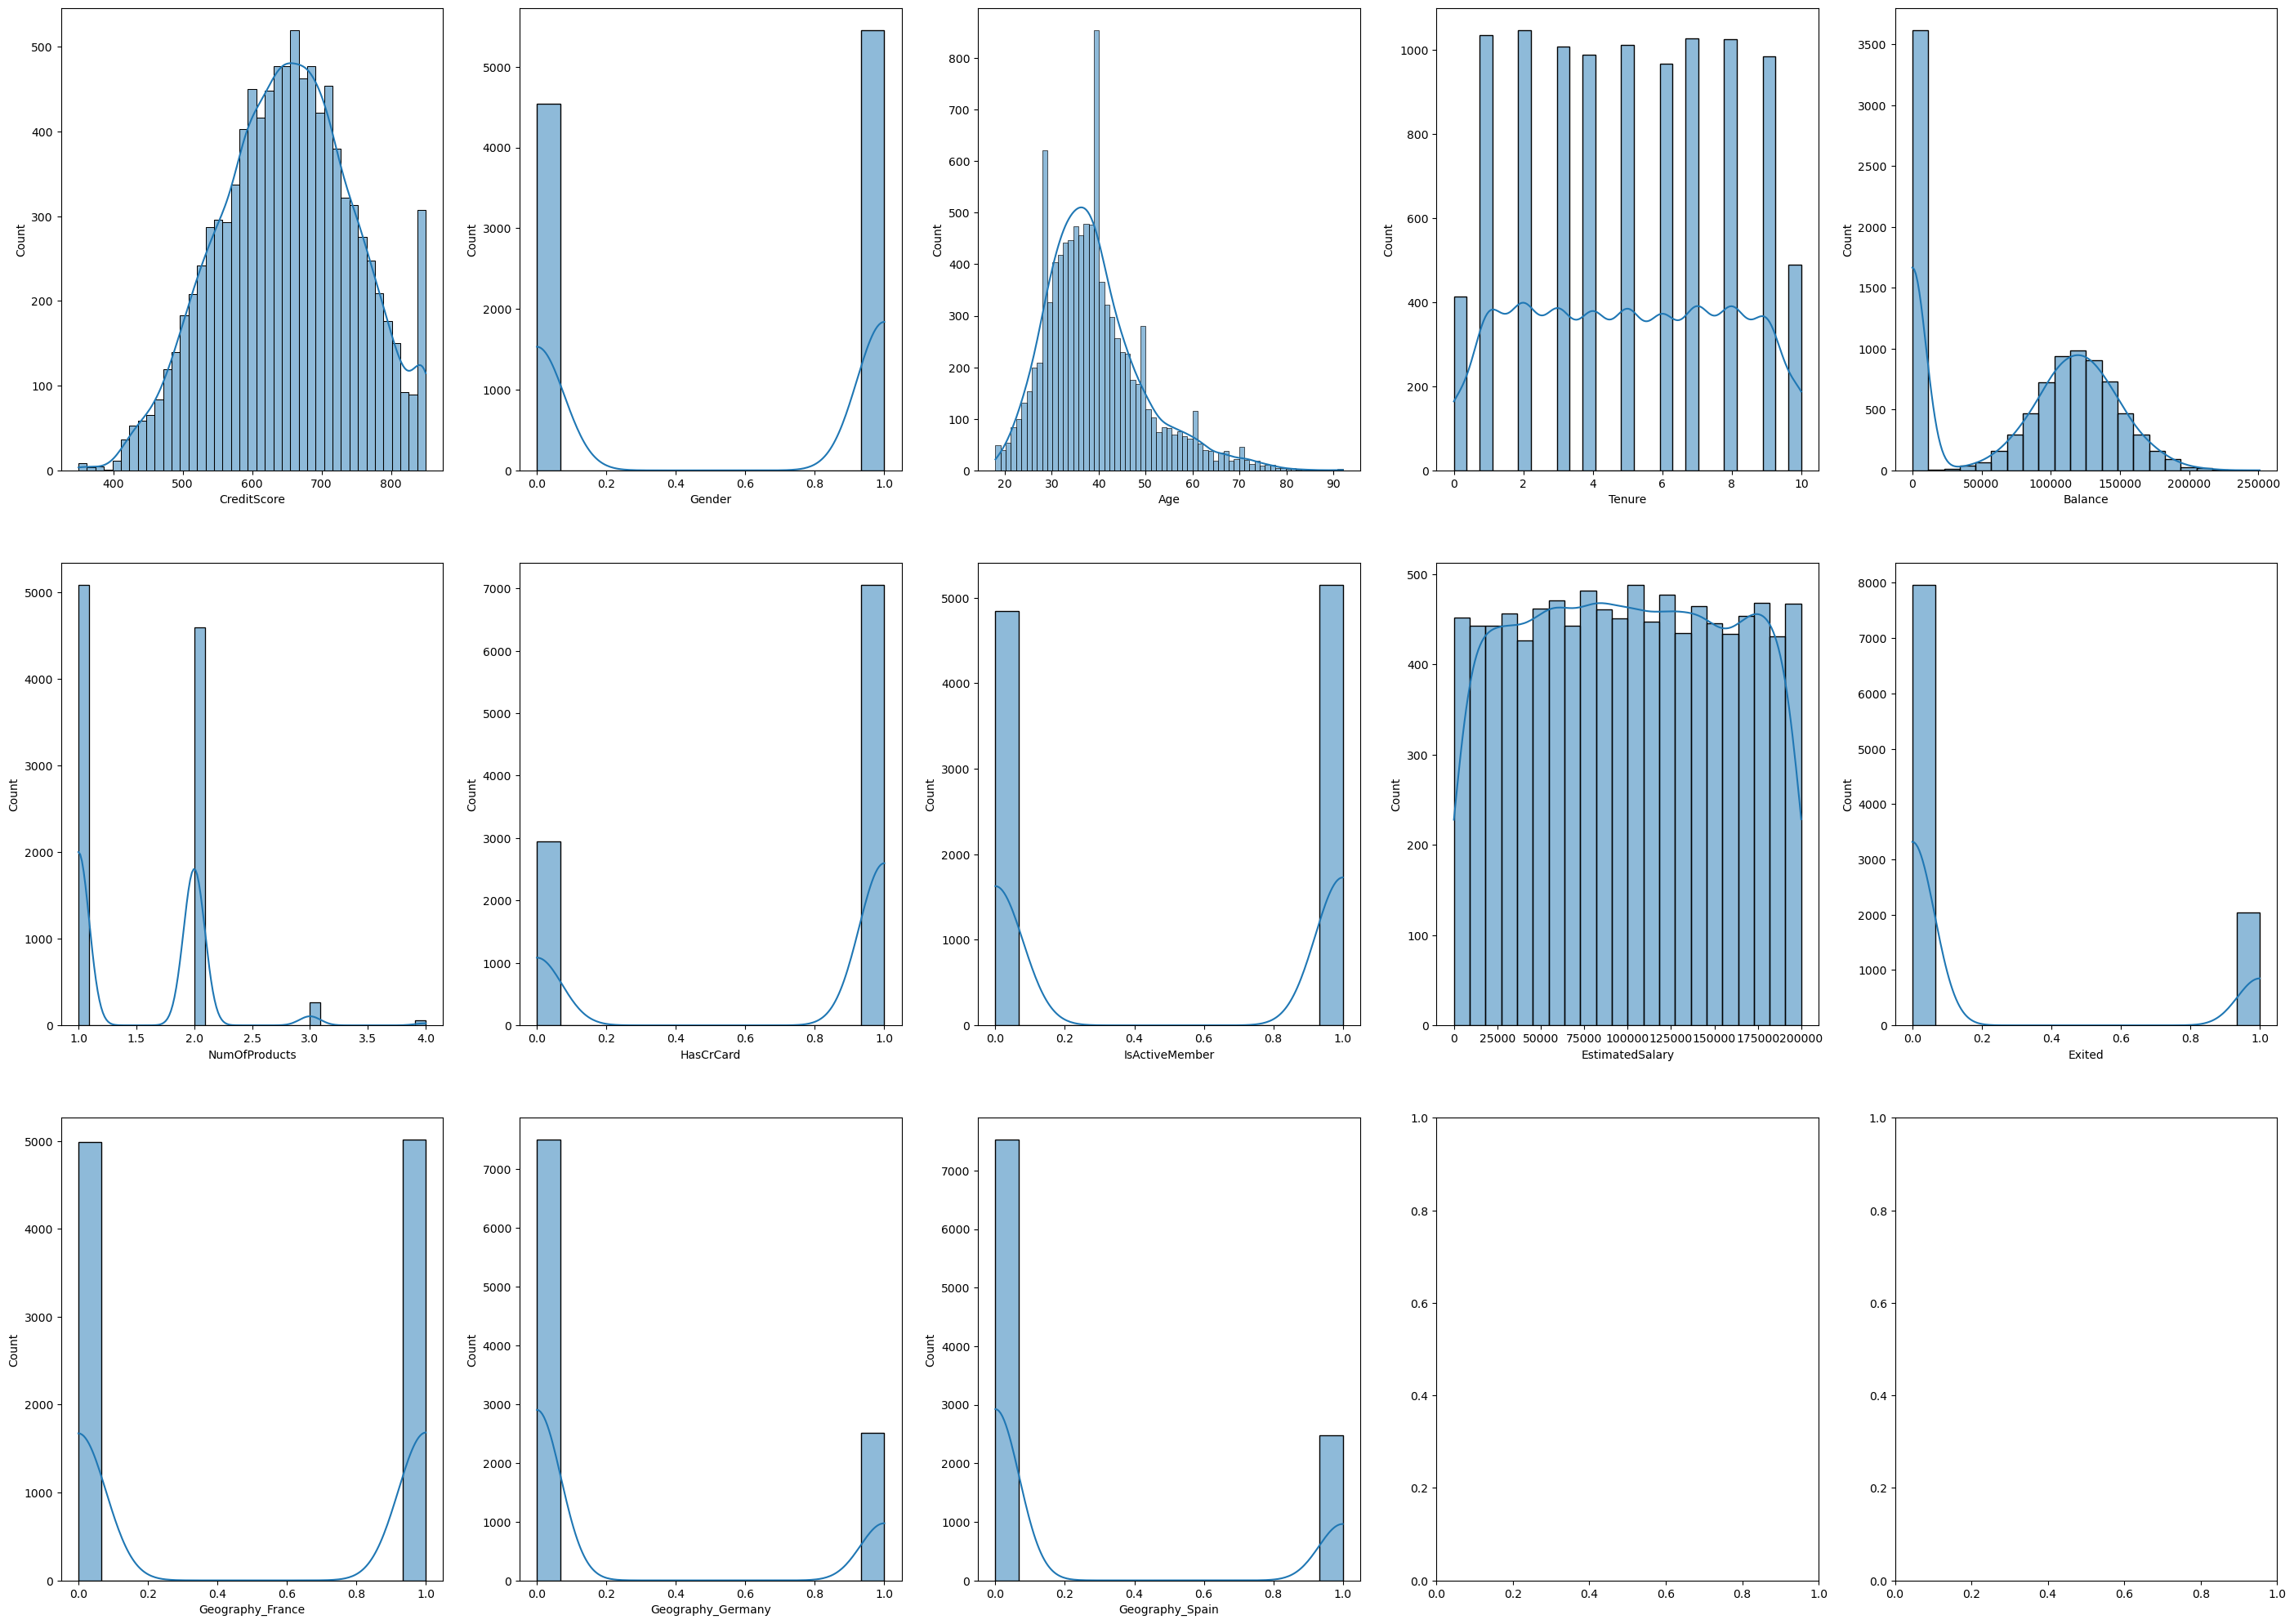

In [361]:
cols = churn_encoded.columns

fig, axes = plt.subplots(3, 5)
fig.set_size_inches(35, 25) 
axes = axes.ravel()  
for col, ax in zip(cols, axes):
    sns.histplot(data=churn_encoded[col], kde=True, ax = ax)

In [363]:
churn.Exited.describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

In [48]:
churn.dtypes.value_counts()

int64      9
object     3
float64    2
Name: count, dtype: int64

In [365]:
#Categorical Variables

churn.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [367]:
churn.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [369]:
#Missing Values

print(churn.isnull().sum().sort_values(ascending=False).to_string())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0


In [89]:
print(churn["Surname"].nunique(), "unique out of", len(churn))


2932 unique out of 10000


In [371]:
#No need for Customer ID & Surname

churn_new = churn.drop(['CustomerId','Surname', 'RowNumber'], axis=1)

print('Old Columns:\n', churn.columns)

print('New Columns:\n', churn_new.columns)

Old Columns:
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
New Columns:
 Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [373]:
#Converting Gender to Numeric
from sklearn.preprocessing import LabelEncoder

churn_new["Gender"] = LabelEncoder().fit_transform(churn["Gender"])

churn_new["Gender"].unique()

array([0, 1])

In [375]:

churn_encoded = pd.get_dummies(churn_new, columns=['Geography']).astype(int)

churn_encoded.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.571500,1.530200,0.70550,0.515100,100089.748400,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.185107,0.581654,0.45584,0.499797,57510.491042,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51001.750000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.000000,1.000000,1.00000,1.000000,100193.500000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127643.750000,2.000000,1.00000,1.000000,149387.750000,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.000000,4.000000,1.00000,1.000000,199992.000000,1.000000,1.000000,1.000000,1.000000


In [287]:
churn_encoded.dtypes

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance              int64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary      int64
Exited               int64
Geography_France     int64
Geography_Germany    int64
Geography_Spain      int64
dtype: object

In [377]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_rescaled = pd.DataFrame(scaler.fit_transform(churn_encoded), columns=churn_encoded.columns)

df_rescaled.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506733,1.0,1.0,0.0,0.0
1,0.516,0.0,0.310811,0.1,0.334028,0.000000,0.0,1.0,0.562708,0.0,0.0,0.0,1.0
2,0.304,0.0,0.324324,0.8,0.636354,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0
4,1.000,0.0,0.337838,0.2,0.500243,0.000000,1.0,1.0,0.395403,0.0,0.0,0.0,1.0
5,0.590,1.0,0.351351,0.8,0.453391,0.333333,1.0,0.0,0.748796,1.0,0.0,0.0,1.0
6,0.944,1.0,0.432432,0.7,0.000000,0.333333,1.0,1.0,0.050260,0.0,1.0,0.0,0.0
7,0.052,0.0,0.148649,0.4,0.458537,1.000000,1.0,0.0,0.596732,1.0,0.0,1.0,0.0
8,0.302,1.0,0.351351,0.4,0.566170,0.333333,0.0,1.0,0.374681,0.0,1.0,0.0,0.0
9,0.668,1.0,0.121622,0.2,0.536485,0.000000,1.0,1.0,0.358604,0.0,1.0,0.0,0.0


In [389]:
type(df_rescaled)

pandas.core.frame.DataFrame

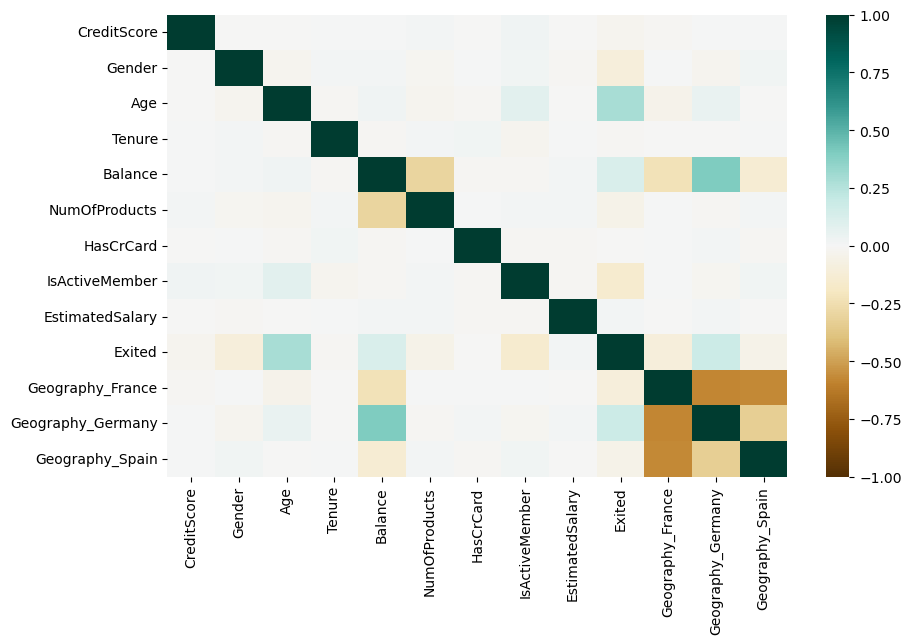

In [391]:

corr=df_rescaled.corr()
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, cmap='BrBG')

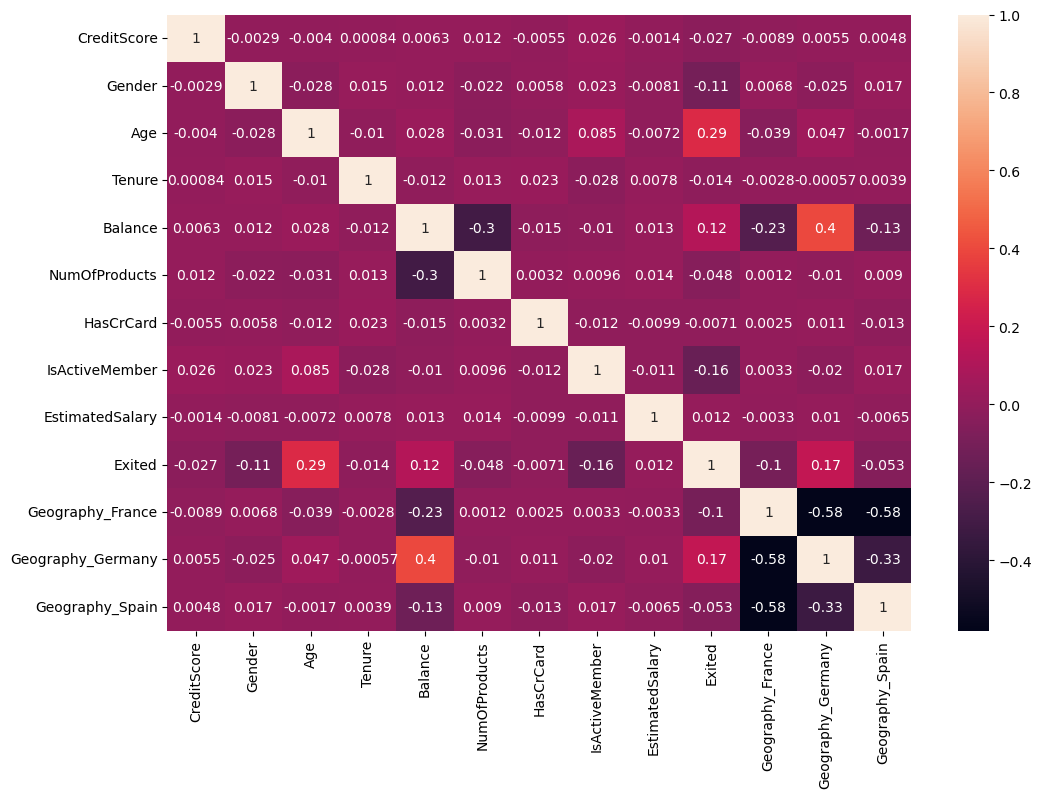

In [395]:
top_feature = corr.index
plt.subplots(figsize=(12, 8))
top_corr = df_rescaled[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()



In [297]:
print("Correlation Matrix of Selected Features:\n", top_corr)

# Optionally, sort the correlation matrix by absolute value to highlight strongest correlations
sorted_corr = top_corr.abs().unstack().sort_values(ascending=False)

Correlation Matrix of Selected Features:
                    CreditScore    Gender       Age    Tenure   Balance  \
CreditScore           1.000000 -0.002857 -0.003965  0.000842  0.006268   
Gender               -0.002857  1.000000 -0.027544  0.014733  0.012087   
Age                  -0.003965 -0.027544  1.000000 -0.009997  0.028308   
Tenure                0.000842  0.014733 -0.009997  1.000000 -0.012254   
Balance               0.006268  0.012087  0.028308 -0.012254  1.000000   
NumOfProducts         0.012238 -0.021859 -0.030680  0.013444 -0.304180   
HasCrCard            -0.005458  0.005766 -0.011721  0.022583 -0.014858   
IsActiveMember        0.025651  0.022544  0.085472 -0.028362 -0.010084   
EstimatedSalary      -0.001384 -0.008112 -0.007201  0.007784  0.012797   
Exited               -0.027094 -0.106512  0.285323 -0.014001  0.118533   
Geography_Germany     0.005538 -0.024628  0.046897 -0.000567  0.401110   
Geography_Spain       0.004780  0.016889 -0.001685  0.003868 -0.134892

In [399]:
# Top Negative and Postive Correlated Variables
top_features1 = ['Age', 'Balance', 'Geography_Germany', 'IsActiveMember', 'Gender']

churn_selected = df_rescaled[top_features1]

top_corr = churn_selected.corr()
print("Correlation Matrix of Selected Features:\n", top_corr)

Correlation Matrix of Selected Features:
                         Age   Balance  Geography_Germany  IsActiveMember  \
Age                1.000000  0.028308           0.046897        0.085472   
Balance            0.028308  1.000000           0.401110       -0.010084   
Geography_Germany  0.046897  0.401110           1.000000       -0.020486   
IsActiveMember     0.085472 -0.010084          -0.020486        1.000000   
Gender            -0.027544  0.012087          -0.024628        0.022544   

                     Gender  
Age               -0.027544  
Balance            0.012087  
Geography_Germany -0.024628  
IsActiveMember     0.022544  
Gender             1.000000  


In [383]:
X = df_rescaled.drop(columns = ['Exited'])
y = df_rescaled['Exited'].values

np.unique(y)

array([0., 1.])

In [385]:
#Splitting Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

print('Shape of training data (features):', X_train.shape)
print('Shape of testing data (features):', X_test.shape)
print('Shape of training data (target):', y_train.shape)
print('Shape of testing data (target):', y_test.shape)

print("Unique values in y_train:", np.unique(y_train))

Shape of training data (features): (7500, 12)
Shape of testing data (features): (2500, 12)
Shape of training data (target): (7500,)
Shape of testing data (target): (2500,)
Unique values in y_train: [0. 1.]


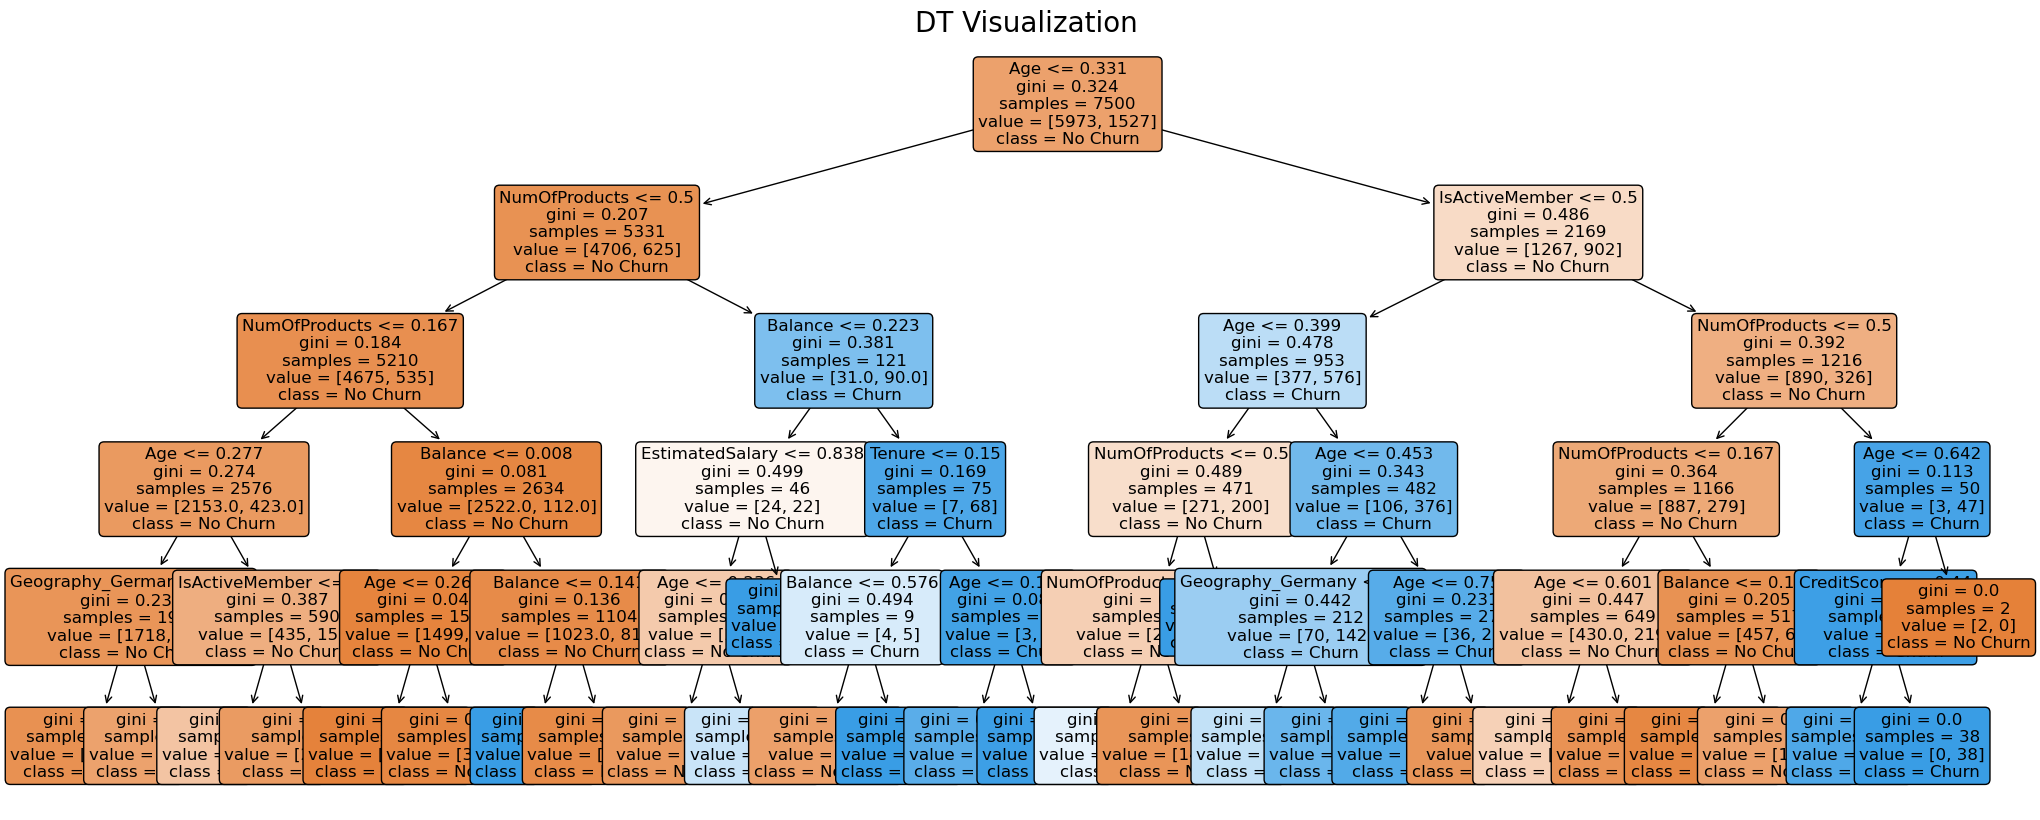

In [431]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

DTMODEL = DecisionTreeClassifier(random_state=42, max_depth=5)  # Initial depth = 5
DTMODEL.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
tree.plot_tree(DTMODEL, feature_names=X.columns, class_names=["No Churn", "Churn"],
               filled=True, rounded = True,
               fontsize = 12)
plt.title("DT Visualization", fontsize = 20)
plt.show()

y_pred_dt = DTMODEL.predict(X_test)

In [433]:
print("\nDecision Tree Predictions:")
for i in range(24):
    print(f"Predicted Value: {y_pred_dt[i]}, Actual Value: {y_test[i]}")


Decision Tree Predictions:
Predicted Value: 1.0, Actual Value: 1.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 1.0, Actual Value: 1.0
Predicted Value: 1.0, Actual Value: 1.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 1.0
Predicted Value: 1.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 1.0, Actual Value: 1.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0
Predicted Value: 0.0, Actual Value: 0.0



Decision Tree Feature:
              Feature  Importance
2                 Age    0.467755
5       NumOfProducts    0.320540
7      IsActiveMember    0.156227
4             Balance    0.032151
10  Geography_Germany    0.013768
8     EstimatedSalary    0.006337
3              Tenure    0.003031
0         CreditScore    0.000190
1              Gender    0.000000
6           HasCrCard    0.000000
9    Geography_France    0.000000
11    Geography_Spain    0.000000


/var/folders/3n/42wqwbhj7qz9ysjjx5dhmtkm0000gn/T/ipykernel_34793/1931632213.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_import, palette='viridis')


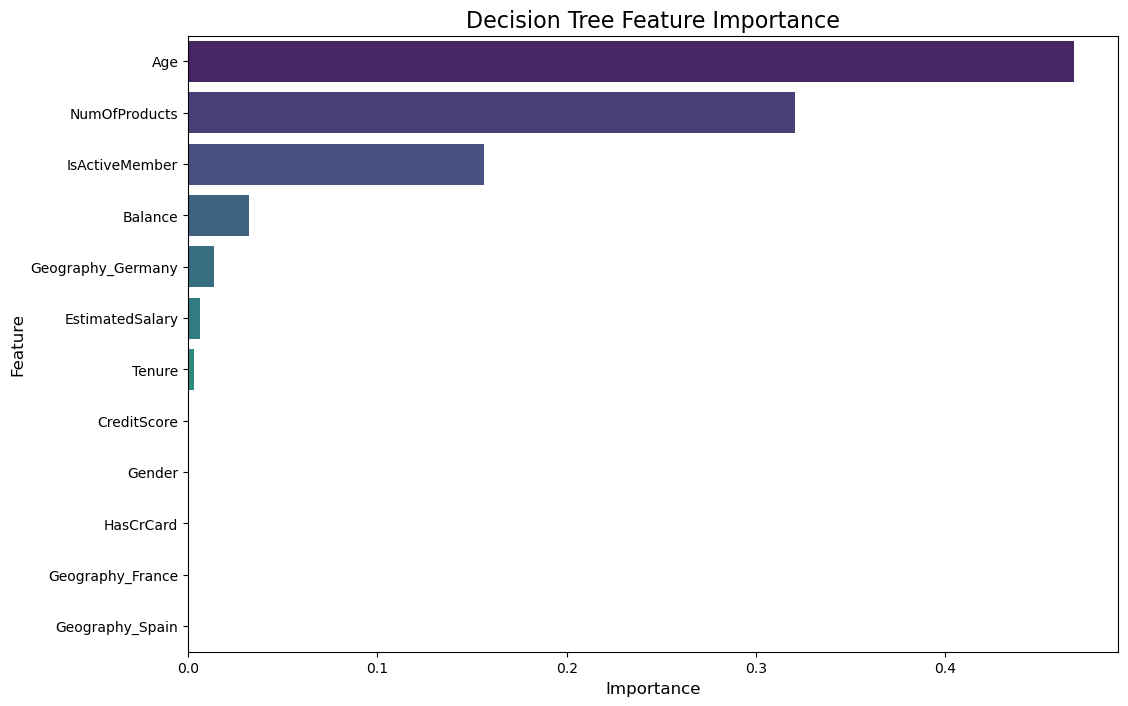

In [435]:
feature_import = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': DTMODEL.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nDecision Tree Feature:")
print(feature_import)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_import, palette='viridis')
plt.title("Decision Tree Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()

In [407]:
print(X_train.shape) 

(7500, 12)


In [409]:
#ANN Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(tf.keras.Input(shape=(12, )))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")




Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.7924 - loss: 0.5110 - val_accuracy: 0.8020 - val_loss: 0.4515
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.8060 - loss: 0.4496 - val_accuracy: 0.8192 - val_loss: 0.4220
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8268 - loss: 0.4071 - val_accuracy: 0.8312 - val_loss: 0.3985
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8353 - loss: 0.3953 - val_accuracy: 0.8376 - val_loss: 0.3742
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.8416 - loss: 0.3775 - val_accuracy: 0.8436 - val_loss: 0.3740
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.8450 - loss: 0.3669 - val_accuracy: 0.8492 - val_loss: 0.3582
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.8487 - loss: 0.3582 - val_accuracy: 0.8492 - val_loss: 0.3598
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.8475 - loss: 0.3586 - 

In [415]:
#Predictions

y_pred1 = model.predict(X_test)
y_pred1 = (y_pred_ann > 0.5).astype(int) 

print("\nPredictions:")
for i in range(24):
    print(f"Predicted Churn Value: {y_pred1[i][0]}, Actual Churn Value: {y_test[i]}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step

Predictions:
Predicted Churn Value: 1, Actual Churn Value: 1.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 1, Actual Churn Value: 1.0
Predicted Churn Value: 1, Actual Churn Value: 1.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 1.0
Predicted Churn Value: 1, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value: 0.0
Predicted Churn Value: 0, Actual Churn Value:

ANN Confusion Matrix: 
[[1886  104]
 [ 262  248]]


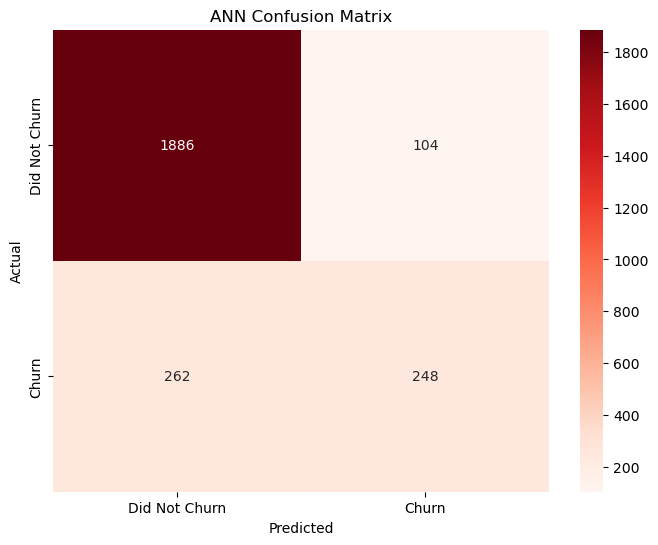


 Classification Report: 
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      1990
         1.0       0.70      0.49      0.58       510

    accuracy                           0.85      2500
   macro avg       0.79      0.72      0.74      2500
weighted avg       0.84      0.85      0.84      2500



In [425]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix1 = confusion_matrix(y_test, y_pred1)
print("ANN Confusion Matrix: ")
print(conf_matrix1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Reds', xticklabels=["Did Not Churn", "Churn"], yticklabels=["Did Not Churn", "Churn"])
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Generate a Classification Report
class_report = classification_report(y_test, y_pred_ann)
print("\n Classification Report: ")
print(class_report)